In [3]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random
from copy import copy
import seaborn as sns
sns.set_theme()

## Exercice 6

In [2]:
def fonction_repartition_bernoulli(p):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.step([-1, 0, 1, 2], [0, 1-p, 1, 1], where="post")
    ax.set_xlabel("x")
    ax.set_ylabel("F(x)")
    ax.set_title(f"Fonction de répartition d'une variable de Bernoulli de paramètre {p}")
    ax.set_ylim([-0.1, 1.1])
    plt.show()

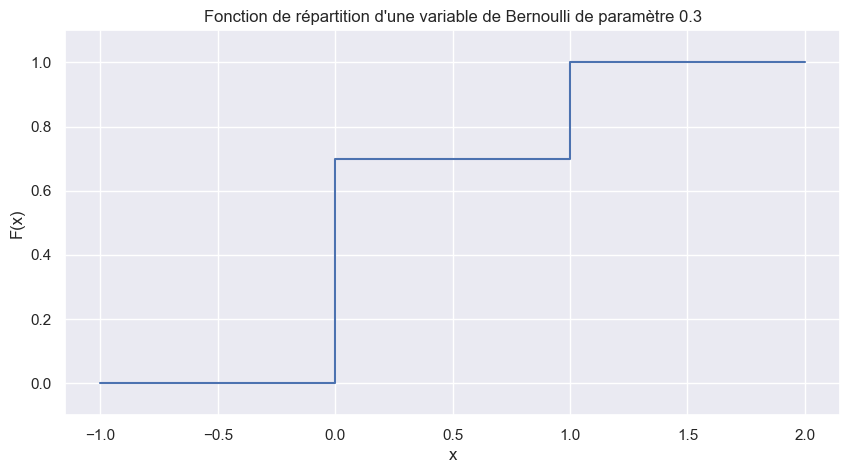

In [3]:
fonction_repartition_bernoulli(0.3)

In [4]:
def fonction_repartition_uniform_D(N):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.step(range(0, N+2), [0] + [i/N for i in range(1, N+1)] + [1], where="post")
    ax.set_xlabel("x")
    ax.set_ylabel("F(x)")
    ax.set_title(f"Fonction de répartition d'une variable uniforme sur [1,2,...,{N}]")
    ax.set_ylim([-0.1, 1.1])
    plt.show()

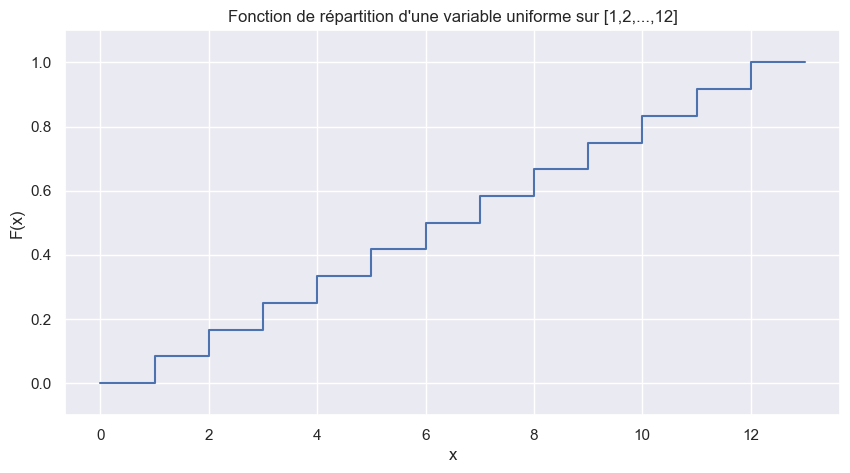

In [5]:
fonction_repartition_uniform_D(12)

In [6]:
def fonction_repartition_uniform(a=0, b=1):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot([a,b],[0,1])
    ax.set_xlabel("x")
    ax.set_ylabel("F(x)")
    ax.set_title(f"Fonction de répartition d'une variable uniforme sur l'intervalle [{a},{b}]")
    ax.set_ylim([-0.1, 1.1])
    ax.set_xlim([a-0.2, b+0.2])
    plt.show()

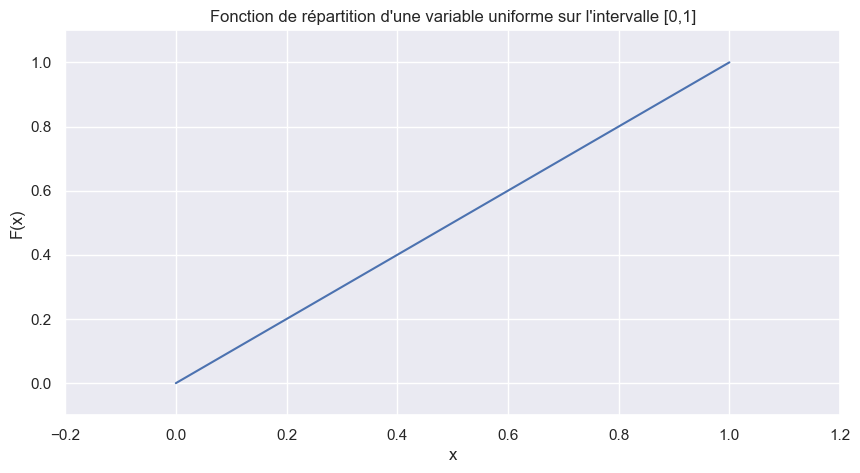

In [7]:
fonction_repartition_uniform()

In [8]:
def trace_fonction_repartition_empirique(echantillon, with_final_drawing=True, with_existing_drawing=None):
    # on trie l'echantillon par ordre croissant
    echantillon_trie = copy(echantillon)
    echantillon_trie.sort()
    xmin = min(echantillon)
    xmax = max(echantillon)
    n = len(echantillon)
    
    # on dessine la fonction de répartition empirique
    if with_existing_drawing==None:
        fig, ax = plt.subplots(figsize=(10,5))
    else:
        fig, ax = with_existing_drawing

    rgb = (random.random(),random.random(),random.random())
    ax.step([xmin-0.2]+list(echantillon_trie)+[xmax+0.2],[0]+[i/n for i in range(1,n+1)]+[1], where="post", color=rgb)
    ax.set_xlabel("x")
    ax.set_ylabel("F(x)")
    ax.set_title(f"Fonction de répartition empirique (taille de l'échantillon = {n})")
    ax.set_ylim([-0.1,1.1])
    
    if with_final_drawing:
        plt.show()

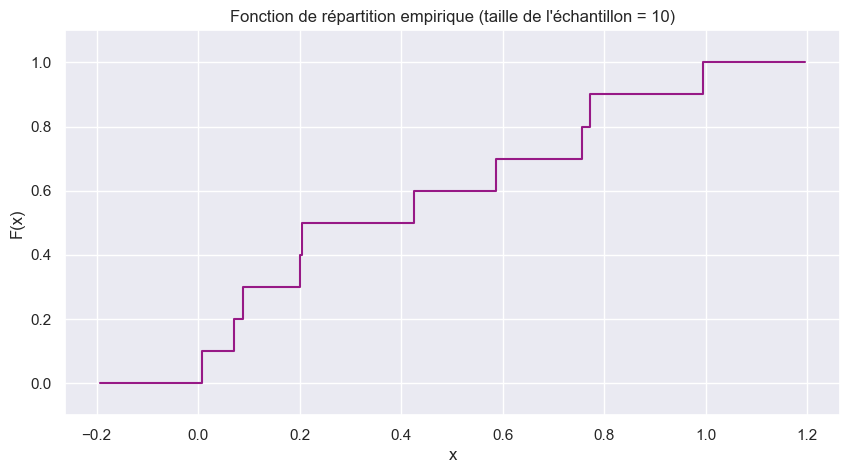

In [9]:
trace_fonction_repartition_empirique(random.random(10))

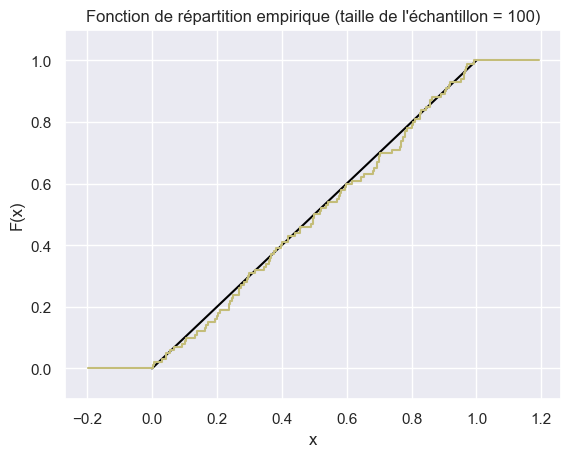

In [10]:
fig, ax = plt.subplots()
ax.plot([0,1], [0,1], color="black")
trace_fonction_repartition_empirique(random.random(100), True, (fig, ax))

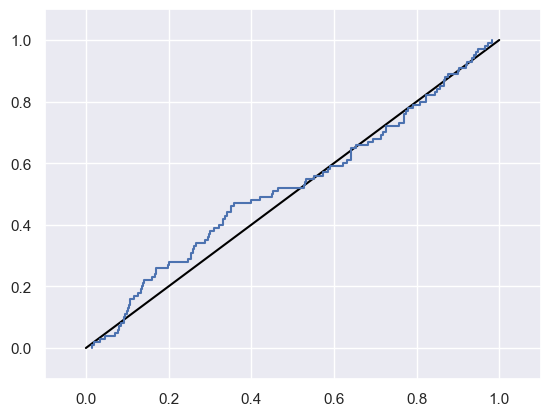

In [11]:
fig, ax = plt.subplots()
ax.plot([0,1], [0,1], color="black")
ax.ecdf(random.random(100), color=sns.color_palette()[0])
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

# Exercice 8

La fonction de répartition d'une loi exponentielle de paramètre $L$ est $F(x) = 1_{x>0}\,
(1-\mathrm{e}^{-L x})$, donc sa réciproque est $F^{-1}(u) = - \frac{1}{L}\,\log(1-u)$. Comme $U$ et $1-U$ ont même loi si $U$ est uniforme sur $[0,1]$, on peut prendre pour simuler une variable exponentielle de paramètre $L$ la variable $X = -\frac{1}{L}\, \log(U)$.

In [12]:
def variable_exponentielle(L, size=1):
    mlog = (lambda x : - np.log(x))
    alea = random.random(size)
    return mlog(alea) / L

In [13]:
variable_exponentielle(1,10)

array([1.29984881, 0.03661271, 1.68262879, 3.03516049, 0.83344729,
       0.59064804, 1.85941714, 1.27919992, 0.0398006 , 1.26496341])

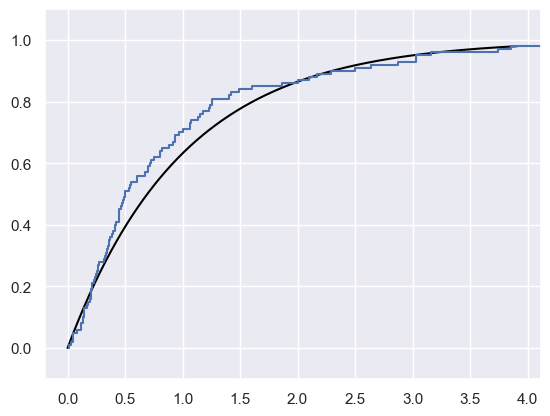

In [14]:
fig, ax = plt.subplots()
m = - math.log(0.02)
xr = np.linspace(0, m, 500)
mapf = (lambda x : 1 - np.exp(-x))
ax.plot(xr, mapf(xr), color="black")
ax.set_xlim([-0.2, m+0.2])
ax.ecdf(variable_exponentielle(1, 100), color=sns.color_palette()[0])
ax.set_ylim(-0.1, 1.1)
plt.show()

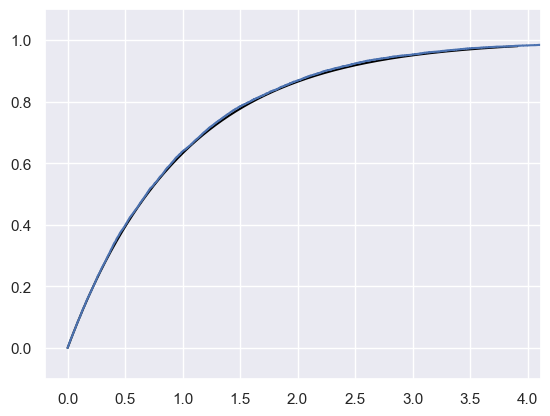

In [15]:
fig, ax = plt.subplots()
m = - math.log(0.02)
xr = np.linspace(0, m, 500)
mapf = (lambda x : 1 - np.exp(-x))
ax.plot(xr, mapf(xr), color="black")
ax.set_xlim([-0.2, m+0.2])
ax.ecdf(variable_exponentielle(1, 10000), color=sns.color_palette()[0])
ax.set_ylim(-0.1, 1.1)
plt.show()


# Exercice 9

La fonction de répartition d'une loi de Cauchy est $F(x) = \frac{1}{\pi} (\arctan(x) + \frac{\pi}{2}) = \frac{1}{\pi} \,\arctan(x) + \frac{1}{2}$, donc sa réciproque est $F^{-1}(u) = \tan(\pi\,(u-\frac{1}{2}))$.

In [4]:
def variable_cauchy(size=1):
    mf = lambda x : np.tan(np.pi * (x - 1/2))
    alea = random.random(size)
    return mf(alea)

In [6]:
variable_cauchy(20)

array([  3.61755124,  -1.04202556,   2.21909879,  -0.30628247,
         1.01582556,  -1.02428221,  -0.09747379,  -4.80752093,
        -2.07660977,  -0.53040148,  -0.76871839,  -2.08040879,
         1.46570934,   0.28148587,   0.73487487,  -0.92782251,
       -25.61678315,  10.97721811,   1.94139936,  -1.45462508])

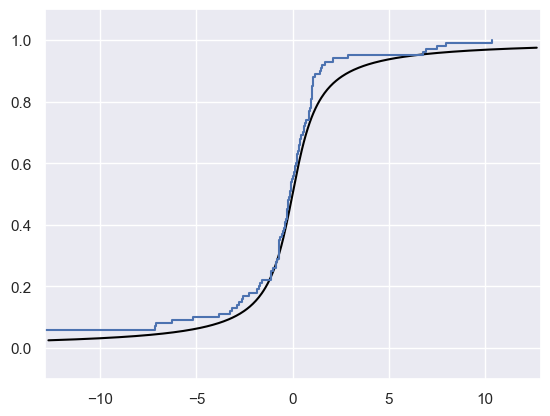

In [9]:
fig, ax = plt.subplots()
m = np.tan(0.475 * np.pi)
xr = np.linspace(-m, m, 500)
mapf = (lambda x : np.arctan(x)/np.pi + 1/2)
ax.plot(xr, mapf(xr), color="black")
ax.set_xlim([- m - 0.2, m + 0.2])
ax.ecdf(variable_cauchy(100), color=sns.color_palette()[0])
ax.set_ylim(-0.1, 1.1)
plt.show()

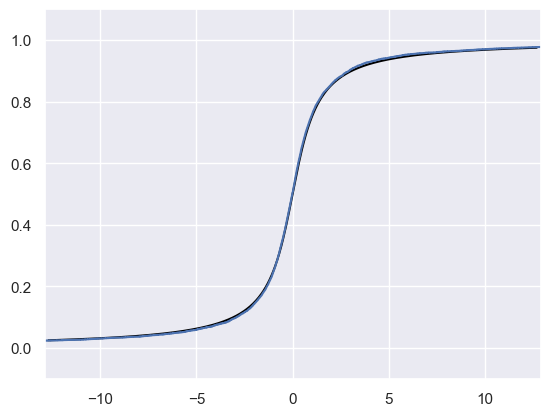

In [10]:
fig, ax = plt.subplots()
m = np.tan(0.475 * np.pi)
xr = np.linspace(-m, m, 500)
mapf = (lambda x : np.arctan(x)/np.pi + 1/2)
ax.plot(xr, mapf(xr), color="black")
ax.set_xlim([- m - 0.2, m + 0.2])
ax.ecdf(variable_cauchy(10000), color=sns.color_palette()[0])
ax.set_ylim(-0.1, 1.1)
plt.show()

# Exercice 10

In [16]:
def distance_to_uniform(N):
    echantillon = random.random(N)
    echantillon.sort()
    L1 = echantillon - np.array([k/N for k in range(N)])
    L2 = np.array([(k+1)/N for k in range(N)]) - echantillon
    return max(max(L1),max(L2))

In [17]:
distance_to_uniform(100)

0.09213129567848388

In [25]:
def draw_distance_to_uniform(N):
    echantillon = random.random(N)
    res = []
    for k in range(1,N+1):
        echantillon2 = copy(echantillon[0:k])
        echantillon2.sort()
        L1 = echantillon2 - np.array([i/k for i in range(k)])
        L2 = np.array([(i+1)/k for i in range(k)]) - echantillon2
        res.append(max(max(L1),max(L2)))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(range(1,N+1), res)
    ax.set_ylim([-0.1,1])
    ax.set_title("Évolution de la distance à la loi uniforme en fonction de N")
    ax.set_xlabel("N")
    ax.set_ylabel("|F_N-F|")
    xr=np.linspace(1, N, 500)
    mf = lambda x : 0.8244/np.sqrt(x)
    ax.plot(xr, mf(xr), color="black")
    plt.show()

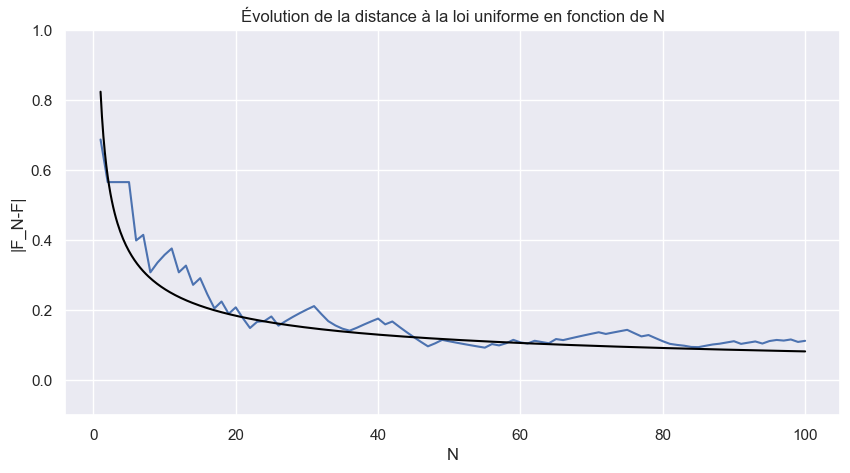

In [26]:
draw_distance_to_uniform(100)

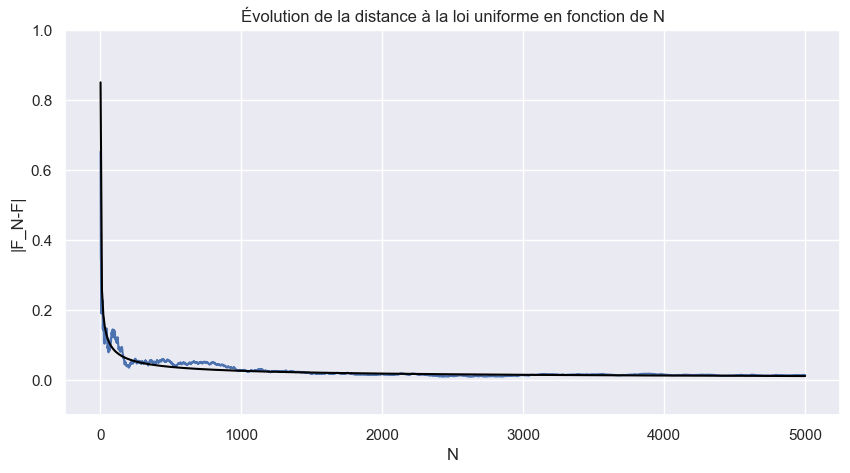

In [20]:
draw_distance_to_uniform(5000)

In [23]:
Nlist = np.array([2**i for i in range(5,15)])
Elist = []
for N in Nlist:
    Elist.append(math.log(np.array([distance_to_uniform(N) for i in range(1000)]).mean()))
np.polyfit(np.log(Nlist), Elist, 1)

array([-0.49357307, -0.1930839 ])

In [24]:
np.exp(-0.1930839)

0.8244128030032476